1. Dataset “Kuiper.xls” (переменные Price, Mileage, Cylinder, Liter, Cruise): 

Провести корреляционный анализ имеющихся данных.  

Построить базовую модель линейной регрессии. 

Вывести результаты анализа базовой модели. 

Записать уравнение линейной регрессии. 

Проверить значимость каждого отдельного коэффициента с помощью  T-test.  

Проверить значимость построенного уравнения регрессии с помощью F-test.  

Построить график рассеяния и уравнения регрессии. 

Построить доверительные интервалы для коэффициентов регрессии.  

В случае подозрения на наличие выбросов, проверить так называемые важные наблюдения, которые значительно влияют на построение модели.  

Используя функцию Step или StepAIC, постараться улучшить модель.  

В случае получения в предыдущем пункте модели, отличной от базовой, повторить пп. c-i для новой модели. 

Построить графики: scatterplot, "Residuals vs Fitted", "Normal Q-Q" , "Residuals vs Leverage" и дать интерпретации.  

Проверить модель на наличие выбросов.  

Проверить модель на гетероскедастичность. 

Проверить остатки модели на автокорреляцию. 

Проверить остатки  модели на нормальность распределения.  

Проверить модель на мультиколлинеарность данных. 

Попробовать применить трансформацию Box-Cox зависимой переменной. 

В случае получения новой модели в предыдущем пункте проанализировать новую модель. 

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.api as sa
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, boxcox
from statsmodels.stats.diagnostic import het_breuschpagan


kuiper = pd.read_excel("D:/python/matstat/me/lab_4/Datasets/kuiper.xls")

# Преобразование столбцов с данными в числовой формат
kuiper[["Price", "Mileage", "Cylinder", "Liter", "Cruise"]] = kuiper[
    ["Price", "Mileage", "Cylinder", "Liter", "Cruise"]
].astype(
    float
)
kuiper = kuiper[["Price", "Mileage", "Cylinder", "Liter", "Cruise"]]


Провести корреляционный анализ имеющихся данных. 

In [6]:
# Вывод корреляционной матрицы
correlation_matrix = kuiper.corr()
print("Корреляционная матрица для базовой модели:")
correlation_matrix

Корреляционная матрица для базовой модели:


,Price,Mileage,Cylinder,Liter,Cruise
Price,1.000000,-0.143051,0.569086,0.558146,0.430851
Mileage,-0.143051,1.000000,-0.029461,-0.018641,0.025037
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.354285
Liter,0.558146,-0.018641,0.957897,1.000000,0.377509
Cruise,0.430851,0.025037,0.354285,0.377509,1.000000


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           6.79e-88
Time:                        20:20:02   Log-Likelihood:                -8329.0
No. Observations:                 804   AIC:                         1.667e+04
Df Residuals:                     799   BIC:                         1.669e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2799.8569   1543.265      1.814      0.0

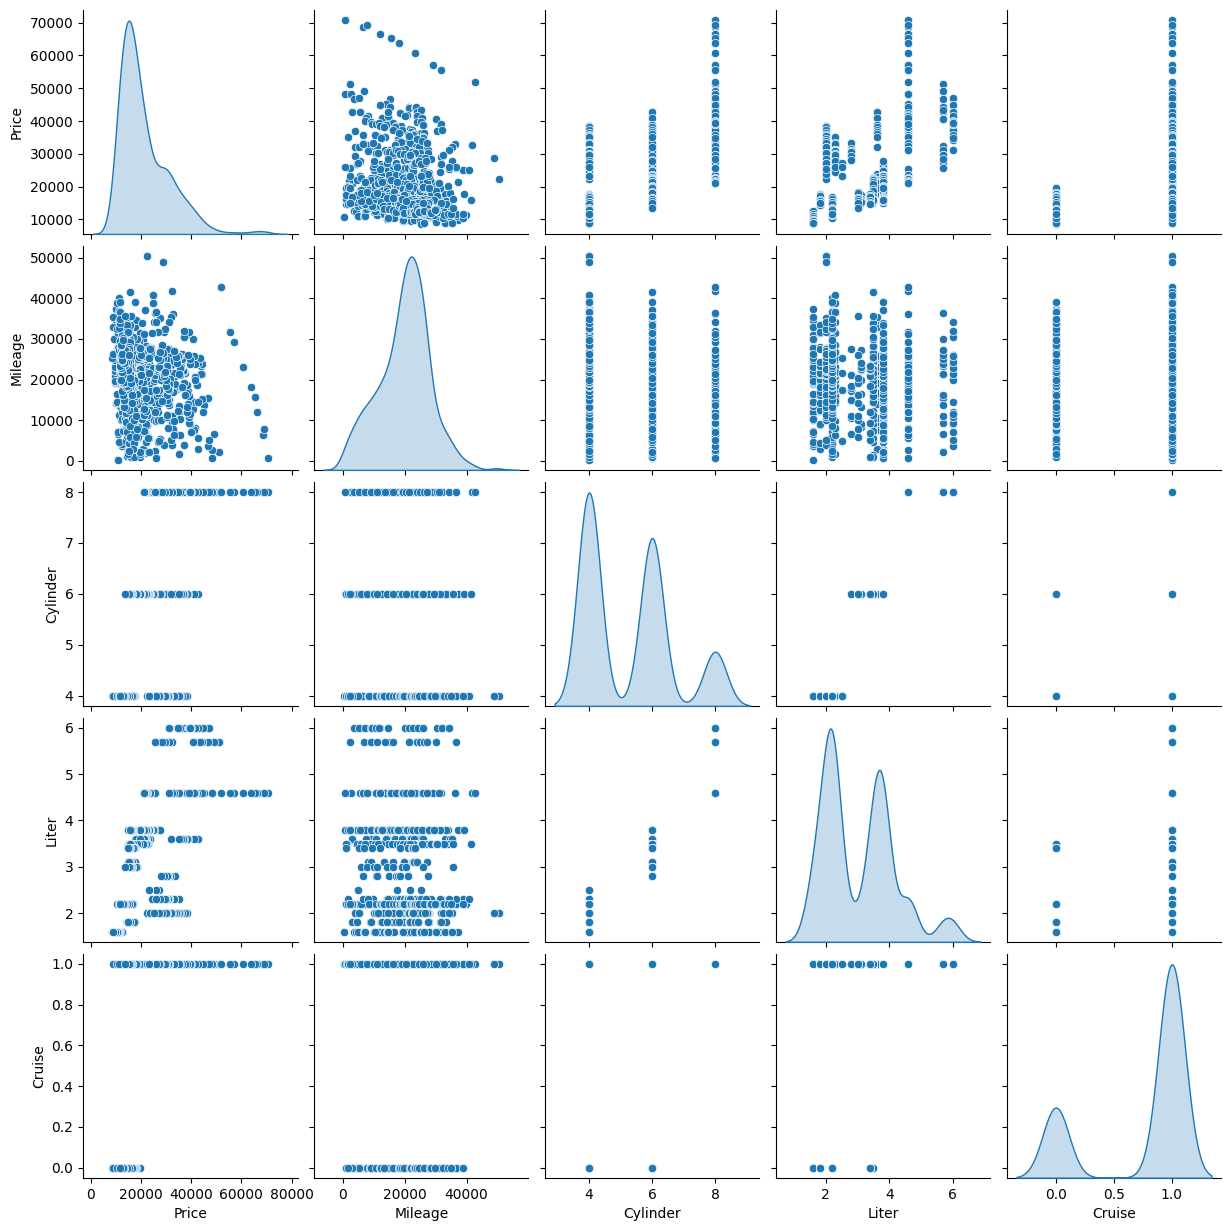

Доверительные интервалы для коэффициентов:
                     0            1
Intercept  -229.475428  5829.189134
Mileage      -0.229222    -0.099555
Cylinder   1674.435862  4341.169490
Liter     -1233.565163  2145.027273
Cruise     4747.983509  7404.114008



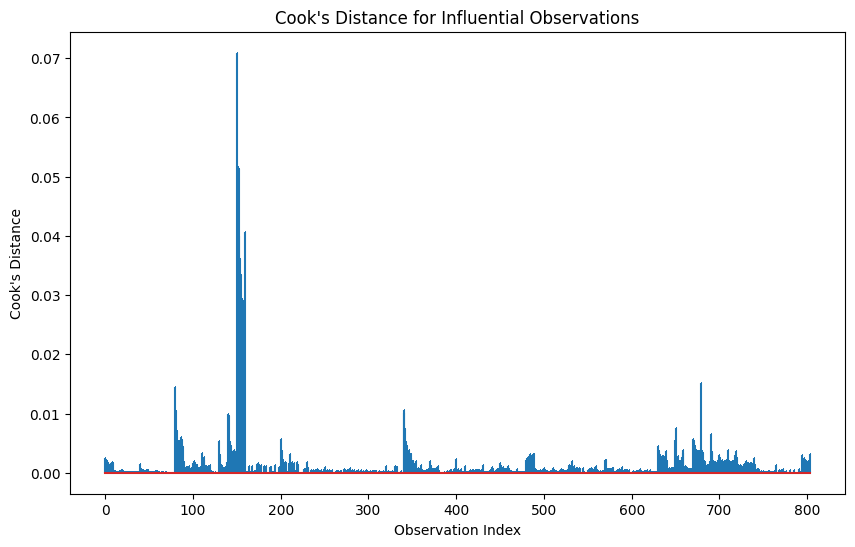

Важные наблюдения:  [80, 81, 82, 83, 84, 85, 86, 88, 130, 140, 141, 142, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 200, 340, 341, 342, 343, 649, 650, 670, 671, 679, 690]
            Price  Mileage  Cylinder  Liter  Cruise
80   51154.047216   2202.0       8.0    5.7     1.0
81   49248.158967   6685.0       8.0    5.7     1.0
82   46747.673270  15343.0       8.0    5.7     1.0
83   44130.617055  21341.0       8.0    5.7     1.0
84   44084.914212  21367.0       8.0    5.7     1.0
85   43892.467880  23371.0       8.0    5.7     1.0
86   44300.639958  23751.0       8.0    5.7     1.0
88   43374.052420  25199.0       8.0    5.7     1.0
130  42741.523666   2846.0       6.0    3.6     1.0
140  48310.329545    788.0       8.0    4.6     1.0
141  48365.980897   2616.0       8.0    4.6     1.0
142  45061.951935  13829.0       8.0    4.6     1.0
150  70755.466717    583.0       8.0    4.6     1.0
151  68566.187189   6420.0       8.0    4.6     1.0
152  69133.731722   7892.0       8.0    4.

In [8]:
def analyze_model(model, features):
    global kuiper
    
    # Вывод результатов анализа
    print(model.summary())
    print("\n")

    # Уравнение регрессии
    count = 0
    if "Intercept" in model.params:
        print("Уравнение линейной регрессии: \nPrice = {:.2f}".format(model.params["Intercept"]), end="")
        for param in features:
            print(" + {:.2f} * {}".format(model.params[features[count]],param), end="")
            count += 1
    else:
        print("Уравнение линейной регрессии: \nPrice = {:.2f} * {}".format(model.params[features[count]],features[count]), end="")
        features.pop(0)
        for param in features:
            print(" + {:.2f} * {}".format(model.params[features[count]],param), end="")
            count += 1
    print("\n")
    
    # Вывод таблицы с результатами T-test для каждого коэффициента
    print(
        "Результаты T-test для каждого коэффициента: \n{}".format(
            model.summary().tables[1]         
        )
    )
    print()
    
    # Значимость уравнения регрессии (F-test)
    print(
        "Значимость уравнения регрессии (F-test): \nF-статистика: {:.2f}, p-value: {:.4f}".format(
            model.fvalue, model.f_pvalue
        )
    )
    print()

    # Построение графика рассеяния и уравнения регрессии
    sns.pairplot(kuiper, diag_kind="kde")
    plt.show()

    # Вывод доверительных интервалов для коэффициентов
    print("Доверительные интервалы для коэффициентов:")
    print(model.conf_int())
    print()

    # Проверка важных наблюдений

    try:
        # Создаём базовую модель с переменной Price как зависимой переменной
        X = kuiper[features]
        X = sa.add_constant(X)  # Добавляем константу
        y = kuiper['Price']
        temp_model_results = sa.OLS(y, X).fit()

        # Вычисляем расстояния Кука
        influence = temp_model_results.get_influence()
        cooks_d = influence.cooks_distance[0]

        # Строим график Кука для поиска важных наблюдений
        plt.figure(figsize=(10, 6))
        plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
        plt.title("Cook's Distance for Influential Observations")
        plt.xlabel("Observation Index")
        plt.ylabel("Cook's Distance")
        plt.show()

        # Порог для идентификации значимых наблюдений
        threshold = 4 / len(kuiper)
        influential_points = [i for i, d in enumerate(cooks_d) if d > threshold]
        print("Важные наблюдения: ", influential_points)
        influential_data = kuiper.iloc[influential_points]
        print(influential_data)
        print("\n")
    except:
        print("\n")


# Создание модели
basic_model_features = ["Mileage", "Cylinder", "Liter", "Cruise"]
formula = "{} ~ {}".format("Price", " + ".join(basic_model_features))
model = sm.ols(formula, data=kuiper)
results = model.fit()

analyze_model(model.fit(), basic_model_features)

+=== УЛУЧШЕННАЯ МОДЕЛЬ ===+

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     179.5
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           5.35e-89
Time:                        21:19:47   Log-Likelihood:                -8329.2
No. Observations:                 804   AIC:                         1.667e+04
Df Residuals:                     800   BIC:                         1.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2332.5222  

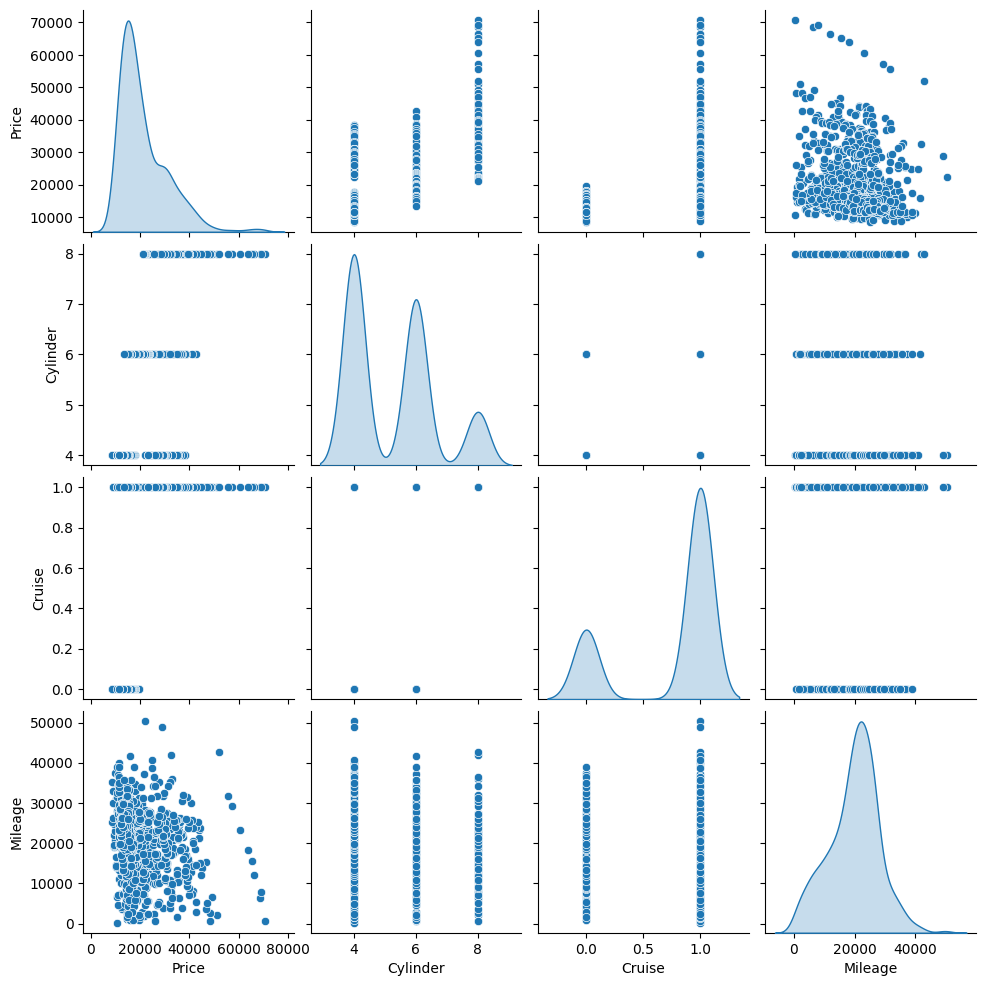

Доверительные интервалы для коэффициентов:
                     0            1
Intercept  -151.503532  4816.547953
Cylinder   2941.085055  3759.215356
Cruise     4812.346609  7440.764603
Mileage      -0.228672    -0.099116



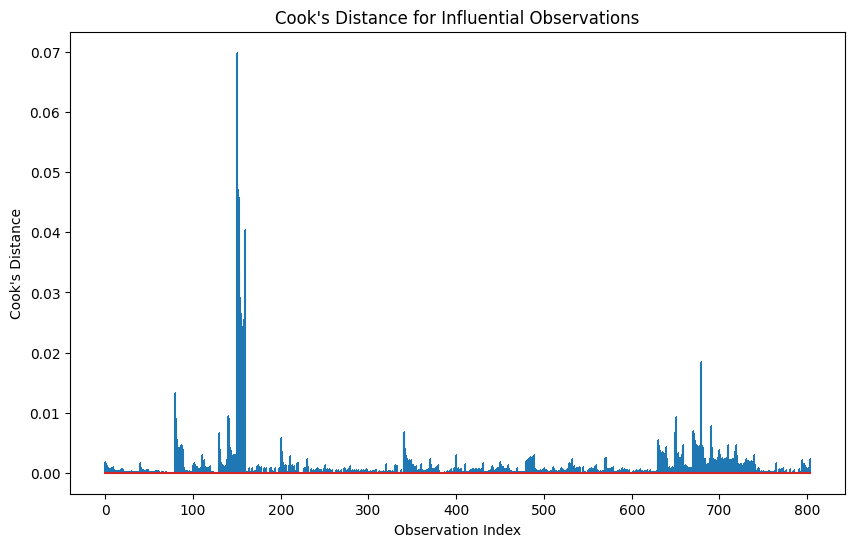

Важные наблюдения:  [80, 81, 82, 130, 140, 141, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 200, 340, 341, 630, 649, 650, 670, 671, 672, 679, 690]
            Price  Cylinder  Cruise  Mileage
80   51154.047216       8.0     1.0   2202.0
81   49248.158967       8.0     1.0   6685.0
82   46747.673270       8.0     1.0  15343.0
130  42741.523666       6.0     1.0   2846.0
140  48310.329545       8.0     1.0    788.0
141  48365.980897       8.0     1.0   2616.0
150  70755.466717       8.0     1.0    583.0
151  68566.187189       8.0     1.0   6420.0
152  69133.731722       8.0     1.0   7892.0
153  66374.307040       8.0     1.0  12021.0
154  65281.481237       8.0     1.0  15600.0
155  63913.117248       8.0     1.0  18200.0
156  60567.549093       8.0     1.0  23193.0
157  57154.443437       8.0     1.0  29260.0
158  55639.087654       8.0     1.0  31805.0
159  52001.994379       8.0     1.0  42691.0
200  10813.343521       4.0     1.0    266.0
340  46732.606030       8.0     1.0  

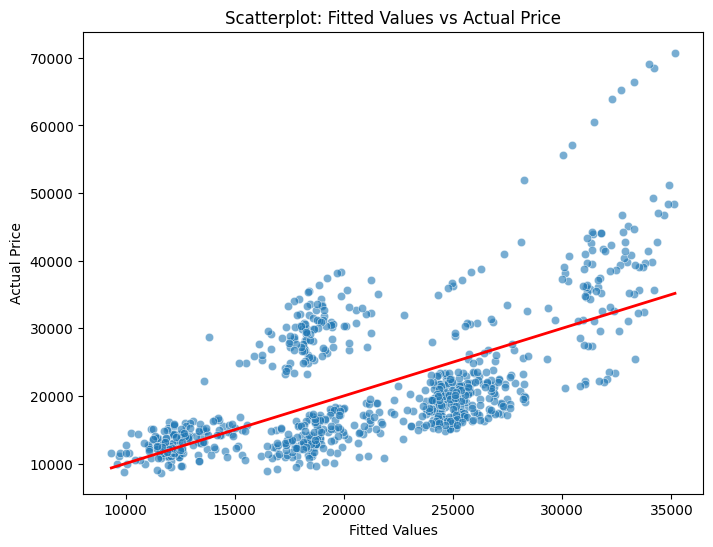

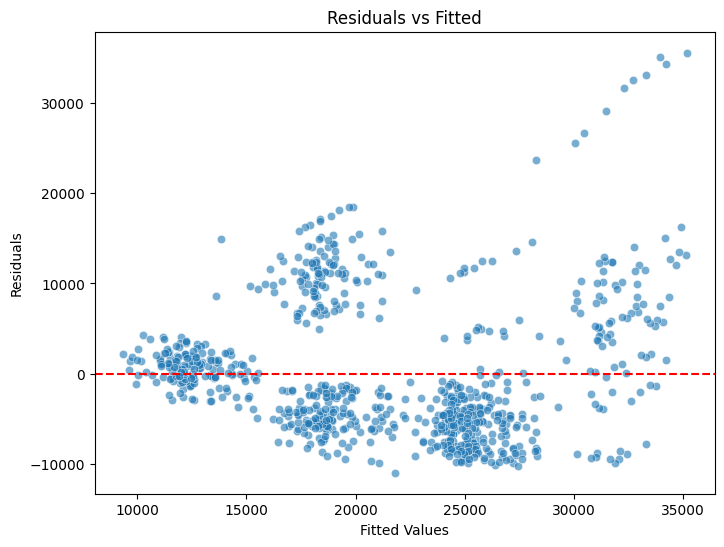

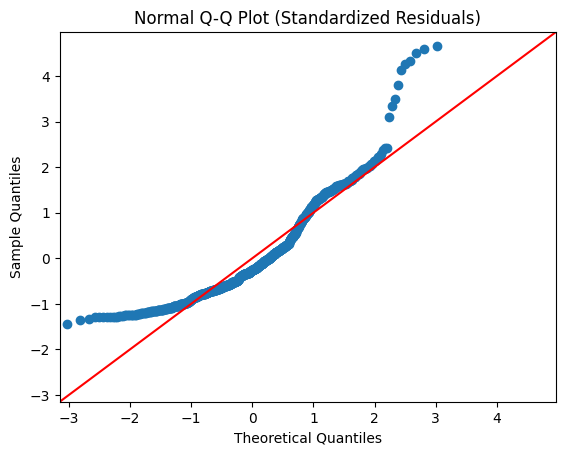

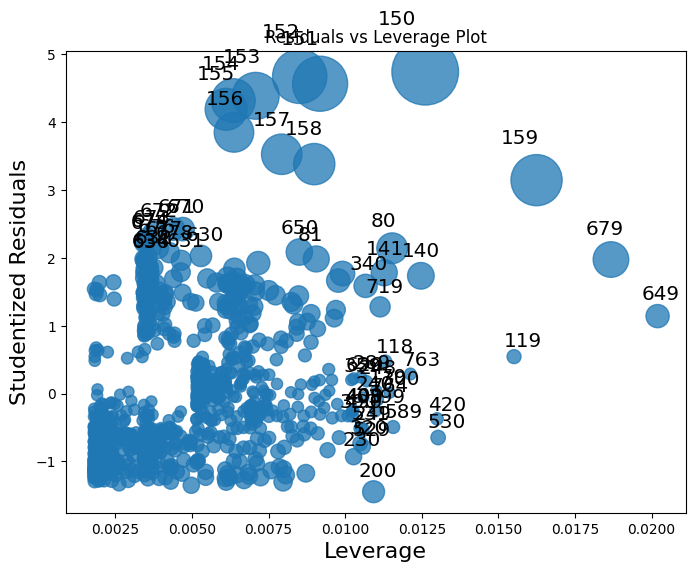

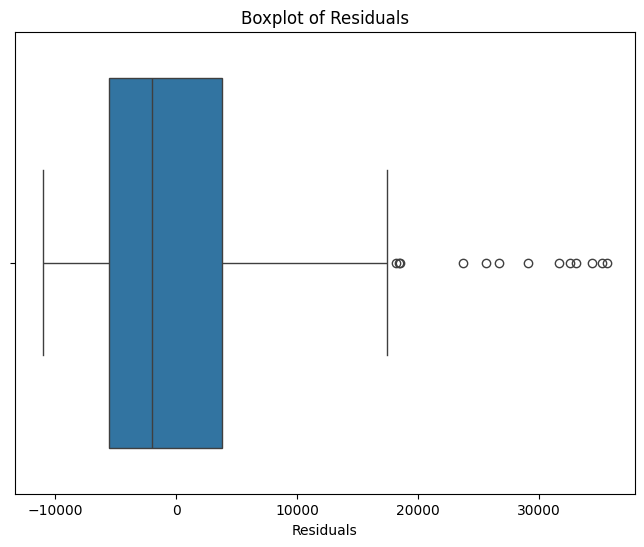

Номера выбросов: 13
Выбросы:
 150    35590.737215
151    34358.104526
152    35166.900412
153    33084.192331
154    32577.941658
155    31635.700982
156    29108.453483
157    26689.690190
158    25591.443573
159    23738.495833
670    18446.603846
671    18464.662267
672    18160.544804
dtype: float64


Результаты теста Бреуша-Пагана:
Lagrange multiplier statistic: 70.35817270857498
p-value: 3.577341192897252e-15
f-value: 25.574031756371514
f p-value: 8.349791526054693e-16

Результаты теса Дарбина-Уотсона: 0.2201028113725538

Результаты теста Шапиро-Уилка: 0.8971338868141174
p-value: 8.991113480282314e-23

     Feature        VIF
0  Intercept  21.966554
1   Cylinder   1.145460
2     Cruise   1.145183
3    Mileage   1.002312

+=== УЛУЧШЕННАЯ МОДЕЛЬ С ПОМОЩЬЮ BOX-COX ===+

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:   

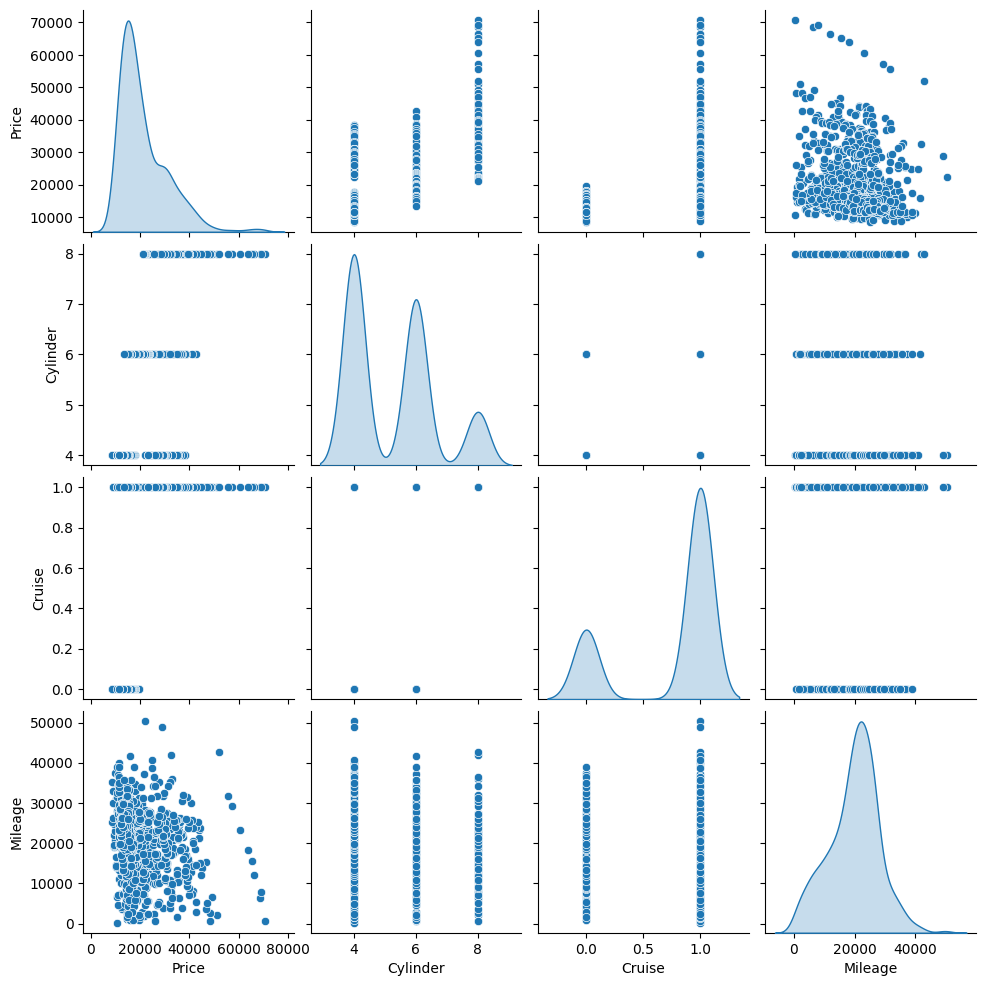

Доверительные интервалы для коэффициентов:
                          0             1
const          1.716457e+00  1.717042e+00
Cylinder       3.845565e-04  5.869772e-04
Cruise         5.485857e-04  8.354246e-04
Cruise_lag1    5.304606e-04  8.140880e-04
Mileage       -3.402323e-08 -1.829681e-08
Cruise_lag2    4.460049e-04  7.372675e-04
Cylinder_lag2 -2.632911e-04 -6.222637e-05





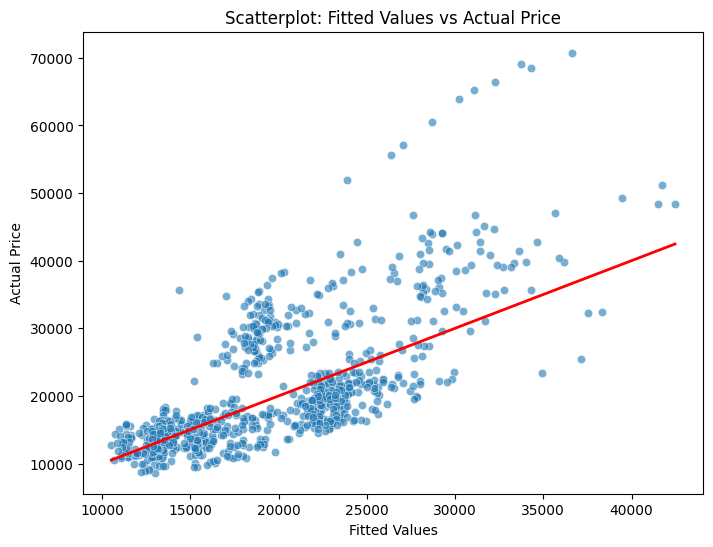

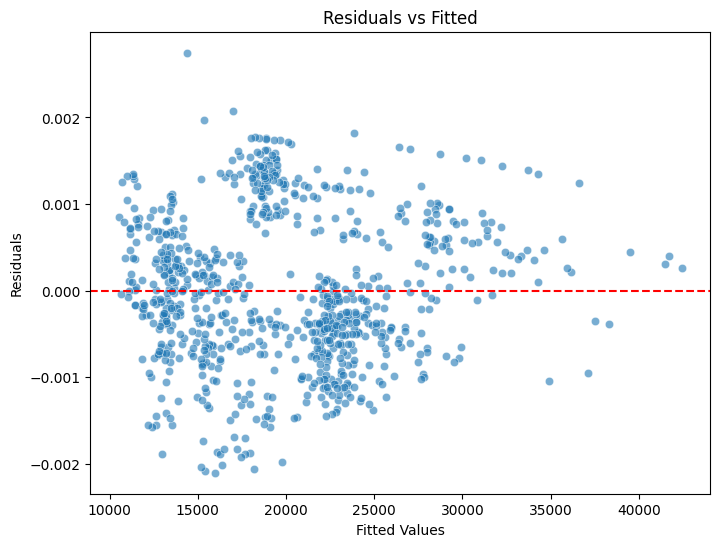

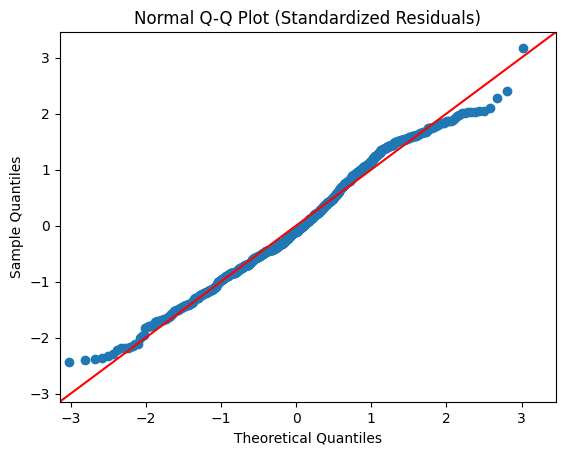

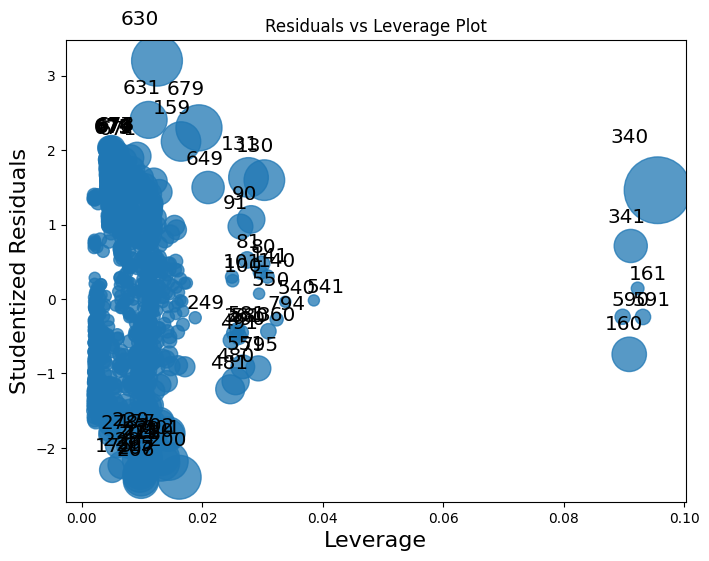

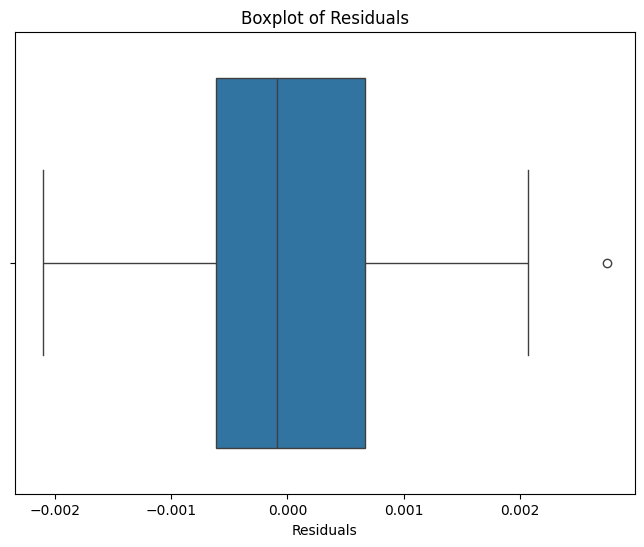

Номера выбросов: 1
Выбросы:
 630    0.002747
dtype: float64


Результаты теста Бреуша-Пагана:
Lagrange multiplier statistic: 162.60440383518844
p-value: 1.6624912357252992e-32
f-value: 33.69601485745762
f p-value: 2.555770598892523e-36

Результаты теса Дарбина-Уотсона: 0.18943196583083524

Результаты теста Шапиро-Уилка: 0.9877297878265381
p-value: 2.9702464416914154e-06

         Feature        VIF
0          const  22.437707
1       Cylinder   8.544367
2         Cruise   1.339229
3    Cruise_lag1   1.280559
4        Mileage   1.005456
5    Cruise_lag2   1.341708
6  Cylinder_lag2   8.534954



In [ ]:
# Функция для нахождения наилучшей модели
def forward_selection(data, response):
    """Возвращает модель с минимальным значением AIC."""
    global kuiper
    initial_features = data.columns.tolist()[1:]
    best_features = []
    best_aic = np.inf
    while initial_features:
        aic_with_candidates = []
        for feature in initial_features:
            candidate_features = best_features + [feature]
            formula = "{} ~ {}".format(response, " + ".join(candidate_features))
            aic = sm.ols(formula, data=data).fit().aic
            aic_with_candidates.append((aic, feature))
        aic_with_candidates.sort()
        best_aic_candidate, best_candidate = aic_with_candidates[0]
        if best_aic_candidate < best_aic:
            best_aic = best_aic_candidate
            best_features.append(best_candidate)
            initial_features.remove(best_candidate)
        else:
            break
    kuiper = kuiper[["Price"] + best_features]
    formula = "{} ~ {}".format(response, " + ".join(best_features))
    model = sm.ols(formula, data=data)
    return model, best_features

# Применяем к нашим данным
best_model, best_features = forward_selection(kuiper, 'Price')

# === Анализ улучшенной модели ===

print("+=== УЛУЧШЕННАЯ МОДЕЛЬ ===+\n")
analyze_model(best_model.fit(), best_features)

# ===============================================

# Предсказанные значения и остатки
best_model = best_model.fit()
fitted_values = best_model.fittedvalues
residuals = best_model.resid

# Scatterplot предсказанных значений vs истинных значений
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=kuiper['Price'], alpha=0.6)
plt.plot([min(fitted_values), max(fitted_values)], [min(fitted_values), max(fitted_values)], color='red', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Actual Price')
plt.title('Scatterplot: Fitted Values vs Actual Price')
plt.show()

# "Residuals vs Fitted" график
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# "Normal Q-Q" график
# Стандартизируем остатки
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

# Построим Q-Q график для стандартизированных остатков
sa.qqplot(standardized_residuals, line='45')
plt.title('Normal Q-Q Plot (Standardized Residuals)')
plt.show()

# "Residuals vs Leverage" график
fig, ax = plt.subplots(figsize=(8, 6))
sa.graphics.influence_plot(best_model, ax=ax, criterion="cooks")
plt.title('Residuals vs Leverage Plot')
plt.show()

# ===============================================

# Построим Boxplot для остатков
plt.figure(figsize=(8, 6))
sns.boxplot(x=residuals)
plt.title('Boxplot of Residuals')
plt.xlabel('Residuals')
plt.show()

# Используем IQR для нахождения выбросов
Q1 = residuals.quantile(0.25)
Q3 = residuals.quantile(0.75)
IQR = Q3 - Q1
outliers = residuals[(residuals < (Q1 - 1.5 * IQR)) | (residuals > (Q3 + 1.5 * IQR))]

print("Номера выбросов:", len(outliers))
print("Выбросы:\n", outliers)
print("\n")

# ===============================================

# Тест Бреуша-Пагана
bp_test = het_breuschpagan(residuals, best_model.model.exog)
bp_test_results = {
    'Lagrange multiplier statistic': bp_test[0],
    'p-value': bp_test[1],
    'f-value': bp_test[2],
    'f p-value': bp_test[3]
}

print("Результаты теста Бреуша-Пагана:")
for key, value in bp_test_results.items():
    print(f"{key}: {value}")
print()

# Поскольку тест Бреуша-Пагана показал значимую зависимость дисперсии от предсказанных значений (очень малое значение p-value),
# можно сделать вывод, что в модели присутствует гетероскедастичность. Это указывает на то, что дисперсия остатков не является постоянной.

# ===============================================

# Расчёт статистики Дарбина-Уотсона
dw_statistic = durbin_watson(best_model.resid)
print("Результаты теса Дарбина-Уотсона:", dw_statistic)
print()

# Значение очень близко к 0 -> положительная автокорреляция

# ===============================================

# Тест Шапиро-Уилка
shapiro_test = shapiro(best_model.resid)
print("Результаты теста Шапиро-Уилка:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
print()

# Распределение - НЕ НОРМАЛЬНОЕ

# ===============================================

# Рассчёт VIF для каждого предиктора в модели
vif_data = pd.DataFrame()
vif_data["Feature"] = best_model.model.exog_names
vif_data["VIF"] = [variance_inflation_factor(best_model.model.exog, i) for i in range(best_model.model.exog.shape[1])]

print(vif_data)
print()

# === Улучшение модели с помощью Box-Cox ===

# Применение Box-Cox трансформации к зависимой переменной
def transform_response(data, response):
    y, fitted_lambda = boxcox(data[response] + 1)  # добавляем 1, чтобы избежать нулевых значений
    data[response] = y
    return data, fitted_lambda

# Добавление лагов к предикторам для устранения автокорреляции
def add_lagged_features(data, lag_features):
    for feature in lag_features:
        data[f"{feature}_lag1"] = data[feature].shift(1)  # добавляем лаг 1
        data[f"{feature}_lag2"] = data[feature].shift(2)  # добавляем лаг 2
    data = data.dropna()  # удаляем строки с NaN после создания лагов
    return data

# Функция для нахождения наилучшей модели с устойчивыми ошибками и лагами
def forward_selection(data, response):
    global best_features
    """Возвращает модель с минимальным значением AIC."""
    data, fitted_lambda = transform_response(data.copy(), response)
    data = add_lagged_features(data, best_features)  # добавляем лаги
    
    initial_features = data.columns.tolist()
    initial_features.remove(response)
    best_features = []
    best_aic = np.inf
    
    while initial_features:
        aic_with_candidates = []
        
        for feature in initial_features:
            candidate_features = best_features + [feature]
            X = sa.add_constant(data[candidate_features])  # добавляем константу
            model = sa.OLS(data[response], X).fit(cov_type='HC3')  # устойчивые ошибки (HC3)
            aic = model.aic
            aic_with_candidates.append((aic, feature))
        
        # Сортируем по AIC
        aic_with_candidates.sort()
        best_aic_candidate, best_candidate = aic_with_candidates[0]
        
        if best_aic_candidate < best_aic:
            best_aic = best_aic_candidate
            best_features.append(best_candidate)
            initial_features.remove(best_candidate)
        else:
            break
    
    # Финальная модель
    X = sa.add_constant(data[best_features])  # добавляем константу для финальной модели
    final_model = sa.OLS(data[response], X).fit(cov_type='HC3')
    
    return final_model, best_features, fitted_lambda

# Применяем к данным
kuiper_with_lags = kuiper.copy()  # создаём копию данных
best_model, best_features, fitted_lambda = forward_selection(kuiper_with_lags, 'Price')

# === Анализ улучшенной с помощью Box-Cox модели ===

print("+=== УЛУЧШЕННАЯ МОДЕЛЬ С ПОМОЩЬЮ BOX-COX ===+\n")
analyze_model(best_model, best_features)


# Предсказанные значения и остатки
fitted_values = best_model.fittedvalues
residuals = best_model.resid

# Обратное Box-Cox преобразование
def inverse_boxcox(y, fitted_lambda):
    if fitted_lambda == 0:
        return np.exp(y)
    else:
        return np.power(y * fitted_lambda + 1, 1 / fitted_lambda)

# Преобразуем предсказанные значения обратно к их исходной шкале
predicted_values = inverse_boxcox(fitted_values, fitted_lambda)

# Scatterplot предсказанных значений vs истинных значений
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values, y=kuiper['Price'], alpha=0.6)
plt.plot([min(predicted_values), max(predicted_values)], [min(predicted_values), max(predicted_values)], color='red', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Actual Price')
plt.title('Scatterplot: Fitted Values vs Actual Price')
plt.show()

# "Residuals vs Fitted" график
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# "Normal Q-Q" график
# Стандартизируем остатки
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

# Построим Q-Q график для стандартизированных остатков
sa.qqplot(standardized_residuals, line='45')
plt.title('Normal Q-Q Plot (Standardized Residuals)')
plt.show()

# "Residuals vs Leverage" график
fig, ax = plt.subplots(figsize=(8, 6))
sa.graphics.influence_plot(best_model, ax=ax, criterion="cooks")
plt.title('Residuals vs Leverage Plot')
plt.show()


# Построим Boxplot для остатков
plt.figure(figsize=(8, 6))
sns.boxplot(x=residuals)
plt.title('Boxplot of Residuals')
plt.xlabel('Residuals')
plt.show()

# Используем IQR для нахождения выбросов
Q1 = residuals.quantile(0.25)
Q3 = residuals.quantile(0.75)
IQR = Q3 - Q1
outliers = residuals[(residuals < (Q1 - 1.5 * IQR)) | (residuals > (Q3 + 1.5 * IQR))]

print("Номера выбросов:", len(outliers))
print("Выбросы:\n", outliers)
print("\n")


# Тест Бреуша-Пагана
bp_test = het_breuschpagan(residuals, best_model.model.exog)
bp_test_results = {
    'Lagrange multiplier statistic': bp_test[0],
    'p-value': bp_test[1],
    'f-value': bp_test[2],
    'f p-value': bp_test[3]
}

print("Результаты теста Бреуша-Пагана:")
for key, value in bp_test_results.items():
    print(f"{key}: {value}")
print()

# Поскольку тест Бреуша-Пагана показал значимую зависимость дисперсии от предсказанных значений (очень малое значение p-value),
# можно сделать вывод, что в модели присутствует гетероскедастичность. Это указывает на то, что дисперсия остатков не является постоянной.


# Расчёт статистики Дарбина-Уотсона
dw_statistic = durbin_watson(best_model.resid)
print("Результаты теса Дарбина-Уотсона:", dw_statistic)
print()


# Тест Шапиро-Уилка
shapiro_test = shapiro(best_model.resid)
print("Результаты теста Шапиро-Уилка:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
print()

# Распределение - НОРМАЛЬНОЕ


# Рассчёт VIF для каждого предиктора в модели
vif_data = pd.DataFrame()
vif_data["Feature"] = best_model.model.exog_names
vif_data["VIF"] = [variance_inflation_factor(best_model.model.exog, i) for i in range(best_model.model.exog.shape[1])]

print(vif_data)
print()
